## PyMC geomod 3


**Importing**

In [1]:
%matplotlib inline
from IPython.core.display import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import shutil
#import geobayes_simple as gs

import pymc as pm # PyMC 2
from pymc.Matplot import plot
from pymc import graph as gr
import numpy as np
#import daft
from IPython.core.pylabtools import figsize
figsize(12.5, 10)

Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
# as we have our model and pygeomod in different paths, let's change the pygeomod path to the default path.
sys.path.append("C:\Users\Miguel\workspace\pygeomod\pygeomod")
#sys.path.append(r'/home/jni/git/tmp/pygeomod_tmp')
import geogrid
import geomodeller_xml_obj as gxml
reload(gxml)


<module 'geomodeller_xml_obj' from 'C:\Users\Miguel\workspace\pygeomod\pygeomod\geomodeller_xml_obj.pyc'>

### Coping our Model in a new folder

In [4]:
try:
    shutil.copytree('C:/Users/Miguel/workspace/Thesis/Geomodeller/Basic_case/Simple_Graben_3', 'Temp_Graben/')
except:
    print "The folder is already created"

## Complex case: Graben
#### Loading pre-made Geomodeller model 

    You have to be very careful with the path, and all the bars to the RIGHT

In [5]:
graben = 'Temp_graben/Simple_Graben_3.xml'#C:\Users\Miguel\workspace\Thesis\Thesis\Temp3
print graben

Temp_graben/Simple_Graben_3.xml


In [12]:
%%timeit
reload(geogrid)
G1 = geogrid.GeoGrid()

# Using G1, we can read the dimensions of our Murci geomodel
G1.get_dimensions_from_geomodeller_xml_project(graben)

nx = 400
ny = 2
nz = 400
G1.define_regular_grid(nx,ny,nz)

10 loops, best of 3: 168 ms per loop


In [10]:
%%timeit
G1.update_from_geomodeller_project(graben)

c_char_p('Temp_graben/Simple_Graben_3.xml')
c_char_p('Temp_graben/Simple_Graben_3.xml')
c_char_p('Temp_graben/Simple_Graben_3.xml')
c_char_p('Temp_graben/Simple_Graben_3.xml')
The slowest run took 12.12 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 235 ms per loop


Tha axis here represent the number of cells not the real values of geomodeller

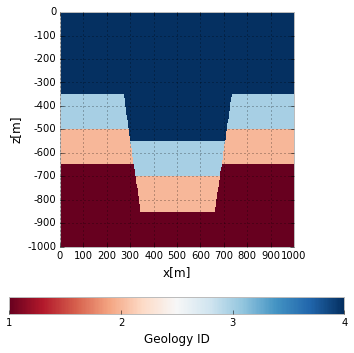

In [14]:
G1.plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True)

####Setting Bayes Model

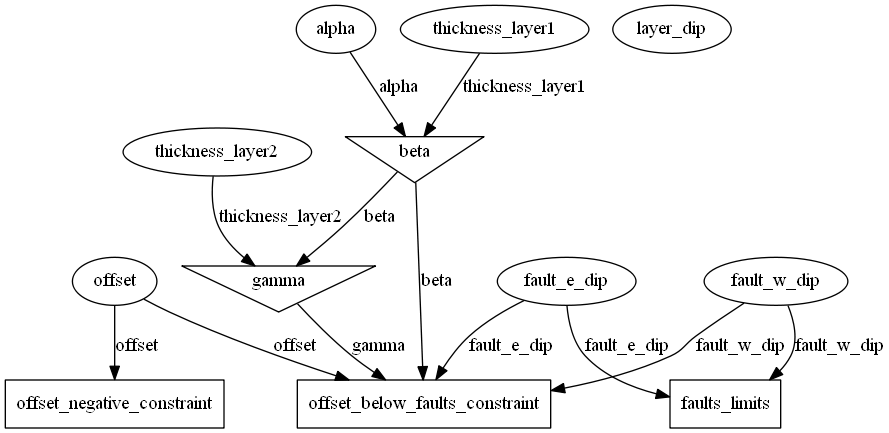

In [15]:
Image("Nice Notebooks\Allparameters_noobs.png")

In [21]:
alpha = pm.Normal("alpha", -350, 0.05)# value= -250)
beta = pm.Normal("beta", -500, 0.001)# value=-400)
gamma = pm.Normal("gamma", -650, 0.001)#, value = 0)

@pm.deterministic
def section(alpha = alpha, beta = beta, gamma = gamma):
    # Create the array we will use to modify the xml
    samples =  [alpha,beta, gamma,alpha,beta, gamma]
    
    # Load the xml to be modify
    hor_lay = 'Temp_test\horizontal_layers.xml'
    
    #Create the instance to modify the xml
        # Loading stuff
    reload(gxml)
    gmod_obj = gxml.GeomodellerClass()
    gmod_obj.load_geomodeller_file(hor_lay)
    
    # Create a dictionary so we can acces the section through the name
    section_dict = gmod_obj.create_sections_dict()
    
    # ## Get the points of all formation for a given section: Dictionary
    contact_points = gmod_obj.get_formation_point_data(section_dict['Section1'])
    
    #Perform the position Change
    for i, point in enumerate(contact_points):
        gmod_obj.change_formation_point_pos(point, y_coord = [samples[i],samples[i]])
    
    # Check the new position of points
              #points_changed = gmod_obj.get_point_coordinates(contact_points)
              #print "Points coordinates", points_changed
    
    # Write the new xml
    gmod_obj.write_xml("Temp_test/new.xml")
    
    
    
    # Read the new xml
    hor_lay_new = 'Temp_test/new.xml'
    G1 = geogrid.GeoGrid()
    
    # Getting dimensions and definning grid
    
    G1.get_dimensions_from_geomodeller_xml_project(hor_lay_new)
    
    # Resolution!
    nx = 2
    ny = 2
    nz = 400
    G1.define_regular_grid(nx,ny,nz)
    
    # Updating project
    G1.update_from_geomodeller_project(hor_lay_new)
    
    # Printing new model
      #G1.plot_section('y',cell_pos=1,colorbar = True,  cmap='RdBu', figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True)
    return G1

#MODEL!!
model = pm.Model([alpha, beta, gamma, section])

c_char_p('Temp_test/new.xml')


In [25]:
M = pm.MCMC(model)
M.sample(iter=1000, burn = 400)

c_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  40%                  ] 403 of 1000 complete in 0.7 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  40%                  ] 405 of 1000 complete in 1.3 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  40%                  ] 407 of 1000 complete in 2.0 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  40%                  ] 409 of 1000 complete in 2.6 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  41%                  ] 411 of 1000 complete in 3.3 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  41%                  ] 413 of 1000 complete in 3.9 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [---------------  41%                  ] 415 of 1000 complete in 4.5 secc_char_p('Temp_test/new.xml')
c_char_p('Temp_test/new.xml')
 [-------

** Extracting Posterior Traces to Arrays **

In [26]:
n_samples = 20

alpha_samples, alpha_samples_all = M.trace('alpha')[-n_samples:], M.trace("alpha")[:]
beta_samples, beta_samples_all = M.trace('beta')[-n_samples:], M.trace("beta")[:]
gamma_samples, gamma_samples_all = M.trace('gamma')[-n_samples:], M.trace('gamma')[:]
section_samples, section_samples_all = M.trace('section')[-n_samples:], M.trace('section')[:]

#print section_samples

** Plotting the results **

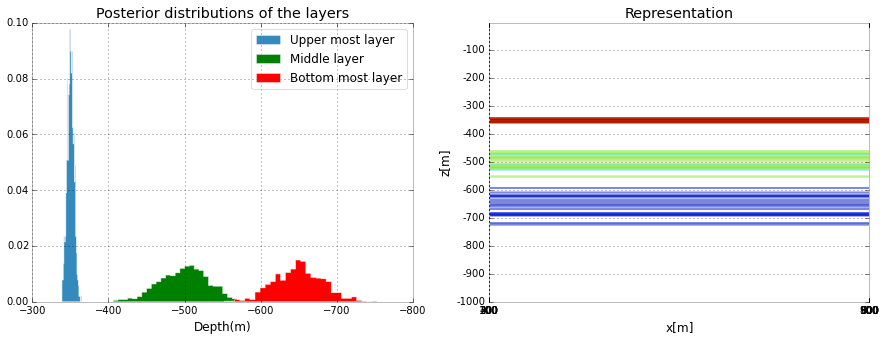

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(alpha_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Upper most layer", normed=True)
ax[0].hist(beta_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Middle layer", normed=True, color = "g")
ax[0].hist(gamma_samples_all, histtype='stepfilled', bins=30, alpha=1,
         label="Bottom most layer", normed=True, color = "r")


ax[0].invert_xaxis()
ax[0].legend()
ax[0].set_title(r"""Posterior distributions of the layers""")
ax[0].set_xlabel("Depth(m)")


ax[1].set_title("Representation")


for i in section_samples:
    i.plot_section('y',cell_pos=1,colorbar = True, ax = ax[1], alpha = 0.3, figsize=(6,6),interpolation= 'nearest' ,ve = 1, geomod_coord= True, contour = True)

In [ ]:
plot(M)